In [2]:
import pandas as pd
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
df.shape

(3999, 12)

In [7]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [8]:
# Step 3: Preprocess
df_original = df.copy()
df.drop(['ID#'], axis=1, inplace=True)

In [9]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [10]:
# Q1: Apply KMeans clustering and find optimal k using Elbow method
inertia = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)


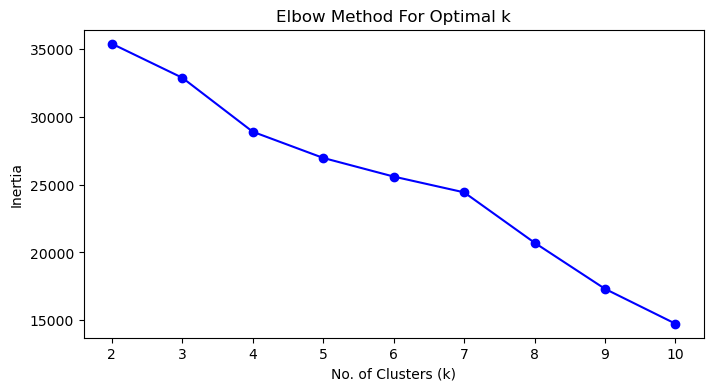

In [11]:
# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('No. of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
# Q2: Apply KMeans with optimal k (say, k=5 based on elbow)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

In [13]:
# Add cluster column and analyze
df_clustered = pd.concat([df_original, df['KMeans_Cluster']], axis=1)
df_clustered.groupby('KMeans_Cluster').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_Cluster,,,,,,,,,,,,
0,1945.497020,58124.779499,193.427890,1.699642,1.019070,1.000000,10816.562574,10.760429,417.281287,1.258641,4271.570918,1.000000
1,1563.870392,139193.010702,145.376932,4.195006,1.002378,1.057075,51174.633769,20.095125,383.443520,1.166468,4938.801427,0.625446
2,1158.110212,59918.329626,70.803842,1.495450,1.020222,1.001011,6402.407482,8.601618,177.680485,0.528817,5632.927199,0.000000
3,3127.675379,34546.727656,93.012648,1.247049,1.011804,1.000000,4428.688027,6.623946,141.472175,0.424958,2101.258853,0.000000
4,1770.708333,196333.680556,773.805556,2.250000,1.041667,1.000000,33783.833333,28.506944,5719.972222,16.868056,4650.562500,0.805556


In [14]:
# Q3: Visualize clusters using PCA for 2D plot (optional)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

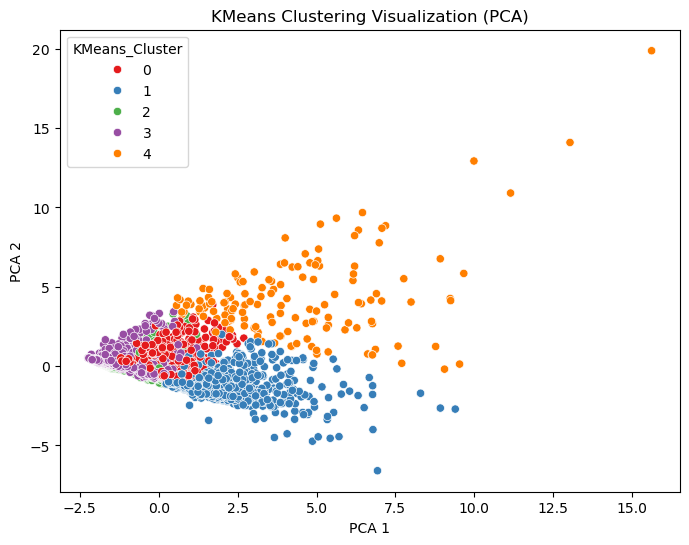

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('KMeans Clustering Visualization (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [16]:
# Q4: Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.8, min_samples=5)  # You may tune eps based on results
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)


In [17]:
# Count of clusters (excluding noise)
df['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    2436
 1    1288
-1     237
 2      15
 3       9
 4       7
 5       7
Name: count, dtype: int64

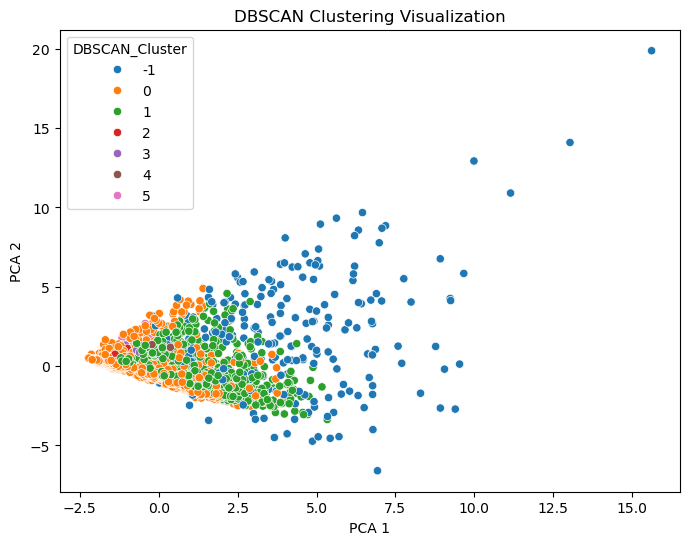

In [18]:
# Q5: Visualize DBSCAN clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [19]:
# Q6: Which method performs better and why?

# KMeans performs better in this scenario as:
# - It forms more balanced and interpretable clusters.
# - DBSCAN identifies outliers (label -1) but may group too many points as noise or into a single cluster,
#   especially if `eps` isn't well tuned.
# - Silhouette score can help evaluate clustering quality.